<a href="https://colab.research.google.com/github/microprediction/winning/blob/main/Ability_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install winning
!pip install pandas
!pip install scipy
from winning.skew_calibration import skew_dividend_implied_ability, skew_ability_implied_dividends
import numpy as np 
import pylab 
import scipy.stats as stats 
import pandas as pd
from winning.skew_calibration import skew_dividend_implied_ability, skew_ability_implied_dividends, state_price_implied_ability
import numpy as np 
import pylab 
from winning.lattice import center_density, skew_normal_density
from winning.lattice_conventions import ALT_UNIT, ALT_L, ALT_SCALE, ALT_A
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 

!pip install nevergrad

# Some empirical ability transforms - just for fun

In [261]:

def normalize(x):
  x_sum = np.sum(x)
  return [xi/x_sum for xi in x]

def standardize(x):
    xc = [xi-np.mean(x) for xi in x]
    xs = [xci/np.std(xc) for xci in xc ] 
    return xs 

def ability_transform(x,a):
    sx = list(reversed(sorted(x)))
    nzx = [ x_ for x_ in sx if x_>0 ][1:-1]  # Chop highest and lowest
    z = normalize(nzx)
    zt = [ max(zi,0.00000000005) for zi in z] # Instability - need to look into this or increase lattice
    density = skew_normal_density(L=2*ALT_L, unit=ALT_UNIT, loc=0., scale=ALT_SCALE, a=a)
    ability = state_price_implied_ability(prices=zt, density=density)
    return standardize(ability) 

def proximity(x,a):
    sa = ability_transform(x,a)
    cdfs = [ stats.norm.cdf(sai) for sai in sa ]
    n = len(cdfs)
    std_cdfs = np.linspace(1/(n+1),1-1/(n+1),n)
    return np.mean([ abs(c1-c2) for c1,c2 in zip(sorted(cdfs),std_cdfs)])

def ability_fit(x):
    """
       Finds the skew best matching the distribution
    """
    def objective(a):
      return proximity(x,a)

    result = minimize(objective, x0=[0], bounds=[(-3,3)],options={'maxiter':100})
    best_a = result.x.tolist()[0] 

    return best_a
    
def ability_plot(x,a=None):
   if a is None:
     a = ability_fit(x)
   y = ability_transform(x,a)
   stats.probplot(y, dist="norm", plot=pylab)
   plt.title('a='+str(a))
   pylab.show()

def manual_search(x):
   ajs = list(np.linspace(-4,4,50))
   prox = [proximity(x,aj) for aj in ajs ]
   plt.plot(ajs,prox)


# Market cap

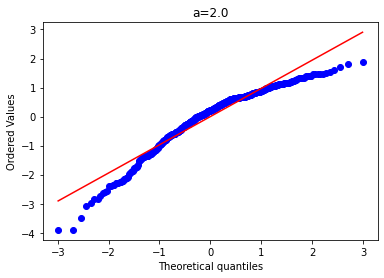

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies-financials/master/data/constituents-financials.csv')
ability_plot(df['Market Cap'].values,a=2.0)

# Snooker prizemoney

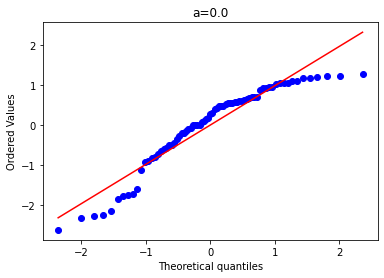

In [165]:
snooker = pd.read_csv('https://raw.githubusercontent.com/rafaluk/snooker_prizes/master/snooker_data.csv',sep=';')
vals=snooker['Money_Prizes'].values
ability_plot(vals,a=0.)

# Power Law

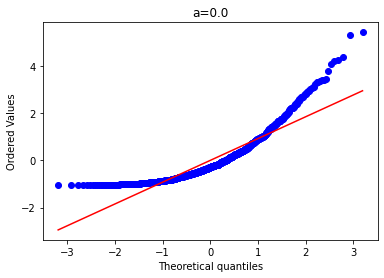

In [193]:
r = stats.powerlaw.rvs(a=1.66, size=1000)
ability_plot(r,0.0)

# More fakery

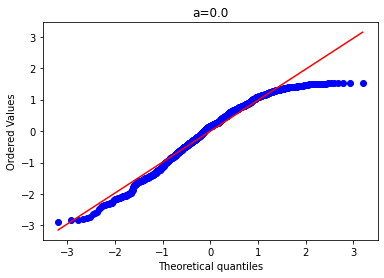

In [205]:
x = stats.expon.rvs(0.5,size=1000)
ability_plot(x,0.0)

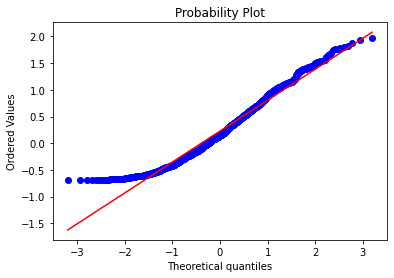

In [207]:
logx = [ math.log(0.0000001+c) for c in x]
f = stats.probplot(logx, dist="norm", plot=pylab)

# Athletic prizemoney

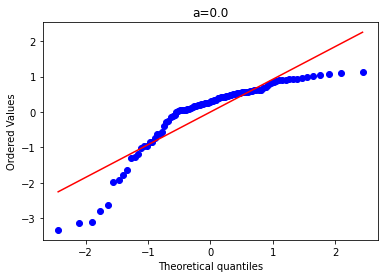

In [208]:
athletes = pd.read_csv('https://raw.githubusercontent.com/ali-ce/datasets/master/Most-paid-athletes/Athletes.csv')
ability_plot(athletes['Total Pay'].replace('[\$,]', '', regex=True).astype(float),a=0.0)

# Global covid cases

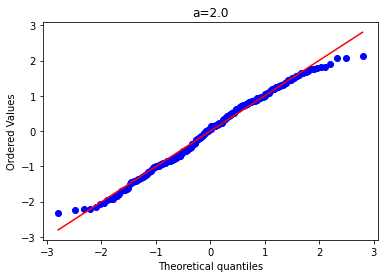

In [174]:
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
vals = covid[covid.columns[-1]].values
ability_plot(vals,a=2.0)

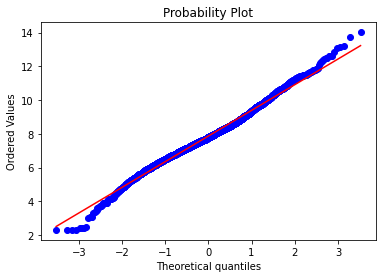

In [209]:
tcases = [ math.log(10+c) for c in scases]
g = stats.probplot(tcases, dist="norm", plot=pylab)

# U.S. Covid by county

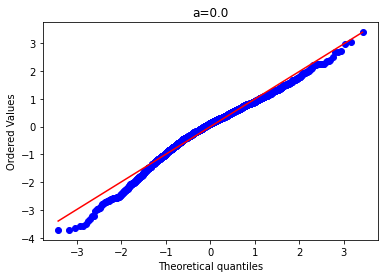

In [176]:
counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')
ccases = [ c for c in sorted(counties['confirmed_cases'].values) if c>0 ]
ability_plot(ccases,a=0.0)

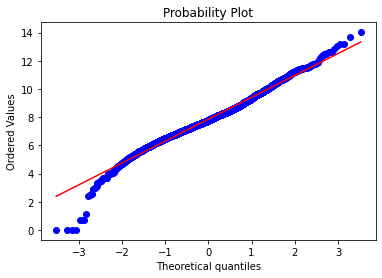

In [210]:
tcases = [ math.log(1+c) for c in scases]
g =stats.probplot(tcases, dist="norm", plot=pylab)

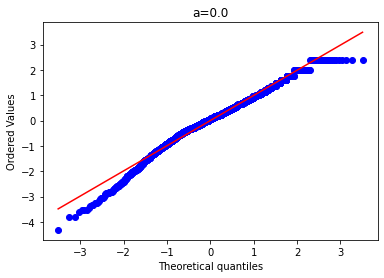

In [213]:
sdeaths = sorted(counties['deaths'].values)
dths = [ d for d in sdeaths if d>0]
ability_plot(dths,a=0.0)

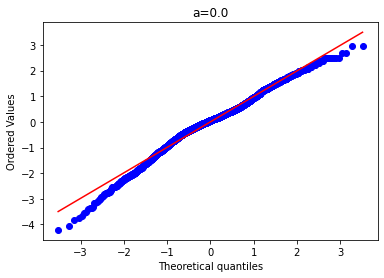

In [214]:
county_density = pd.read_csv('https://raw.githubusercontent.com/camillol/cs424p3/master/data/Population-Density%20By%20County.csv')
sdensity = sorted(county_density['Density per square mile of land area'])
ability_plot(sdensity,a=0.0)


# City sizes

In [217]:
city_sizes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv')

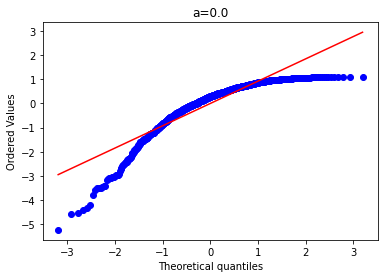

In [218]:
ability_plot(city_sizes['Population'])
# Better fit by power law?

# Different COVID data from paper 
.... that says its a power law

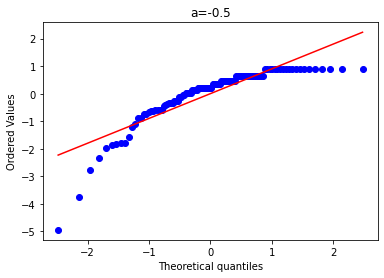

In [219]:
covid_from_power_law = pd.read_csv('https://raw.githubusercontent.com/berndblasius/Covid19/master/data/time_series_19-covid-Deaths.csv')
sv = [ v for v in covid_from_power_law[covid_from_power_law.columns[-1]].values if v>1]
ability_plot(sv,-0.5)

# GDP / capita

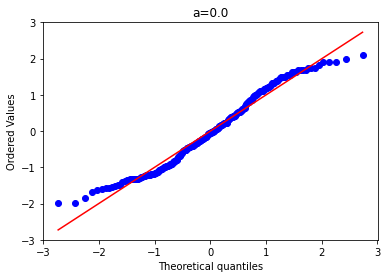

In [222]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/worldFactbook/GDPPerCapita.csv')
vals = df['GDP Per Capita']
ability_plot(vals,a=0.0)

# Laptops per country

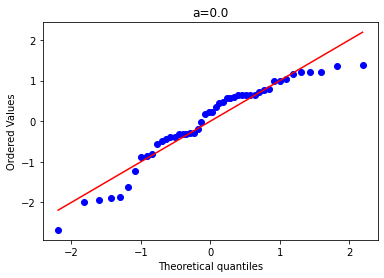

In [224]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/olpc/laptopsPerCountry.csv')
vals = df['count']
ability_plot(vals,a=0.0)

In [ ]:
# Linchings by state

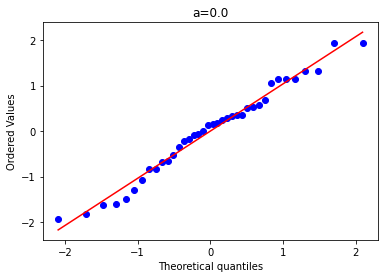

In [226]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/tuskegeeInstitute/lynchings-1882-1968-by-state-and-race.csv')
ability_plot(df['Total'])

# Migrants

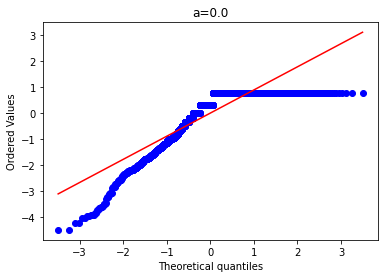

In [228]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/migrants/events.csv')
ability_plot(df['dead_and_missing'])

# Weed prices

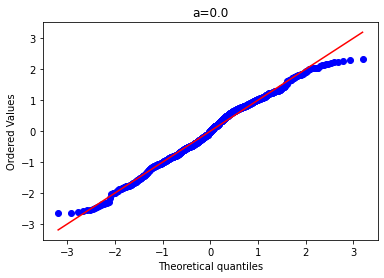

In [235]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/amitkaps/weed/Weed_Price.csv')
ability_plot(df['HighQN'][:1000],a=0.0)

# State populations

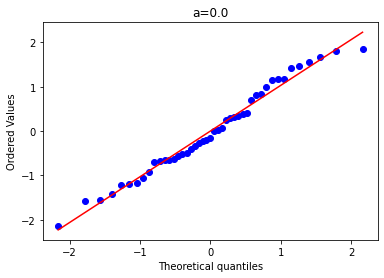

In [236]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/amitkaps/weed/Population_State.csv')
ability_plot(df['value'],a=0.0)

# Syrian violations

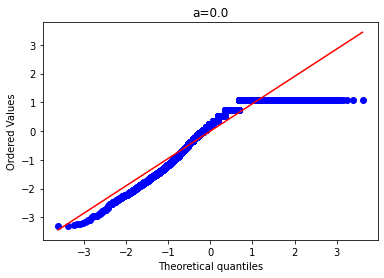

In [240]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/SyriaViolationsDocumentationCenter/dataAggregated.csv')
ability_plot(df['count'],a=0.0)

# Mortality causes

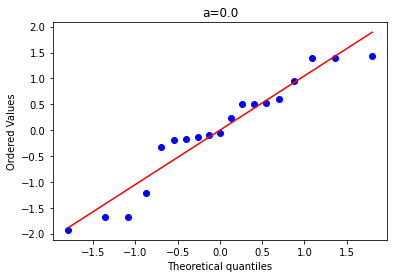

In [244]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/cdc_mortality_mortality_underyling_cause_by_years_simplified.csv')
ability_plot(df['1998'],a=0.0)

# Infant mortality

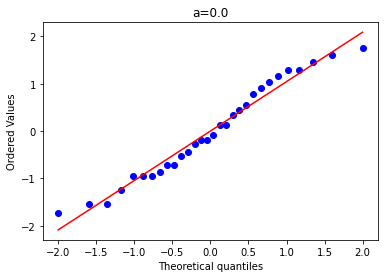

In [247]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/data.gov.in_infantMortalityRate_Infant_Mortality_Rate_1.csv')
ability_plot(df['2011'],a=0.0)

# Petals

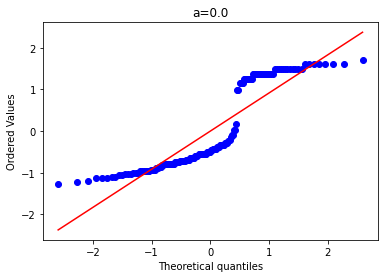

In [250]:
df= pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/iris_iris.csv')
ability_plot(df['Petal Length'],a=0.0)

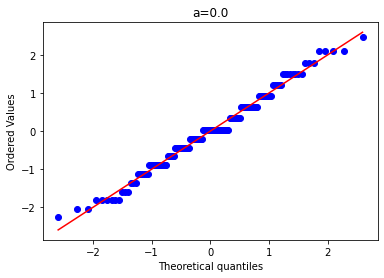

In [251]:
ability_plot(df['Sepal Width'],a=0.0)

# More city populations

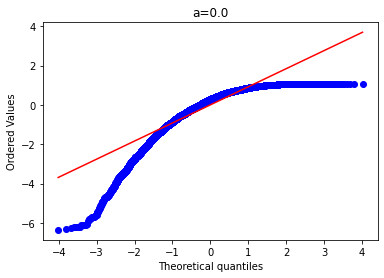

In [259]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/geonames_cities15000.csv')
ability_plot(df['population'],a=0.0)

# browser market share

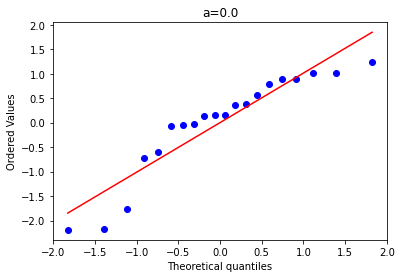

In [262]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/statCounter_currentBrowserMarketShares.csv')
ability_plot(df['marketShare'],a=0.0)

# Earthquake magnitudes

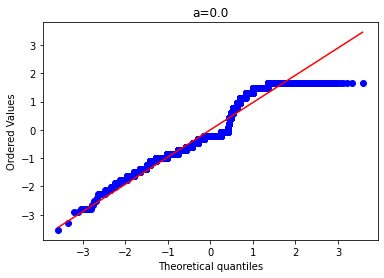

In [267]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/usgs_centennial_earthquakes.csv')
ability_plot(df['magnitude'][:4000],a=0.0)

#Prices

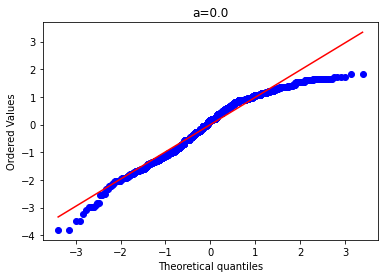

In [272]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/superstoreSales_superstoreSales.csv')
ability_plot(df['Unit Price'][:2000],a=0.)

# Christians by country

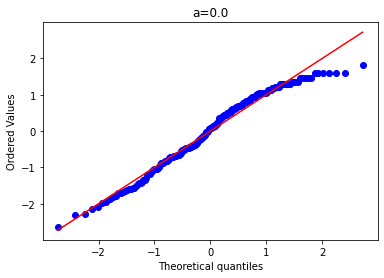

In [277]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/pew/religion/religionByCountry.csv')
ability_plot([float(v) for v in df['Christian'] if not '<' in v],a=0.0)

# Startups

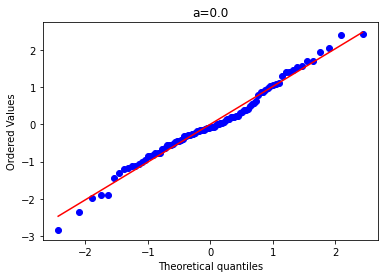

In [284]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/mattermark/2015-top-100-analytics-startups.csv')
ability_plot(df['Growth Score'],a=0.)

# Big data revenue

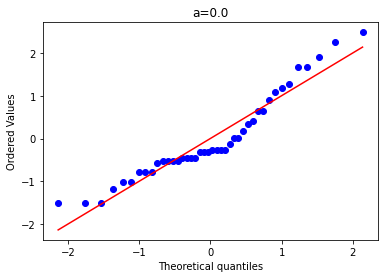

In [294]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/wikibon/revenueBigData2012.csv')
ability_plot(df['% Big Data Software Revenue'],a=0.0)

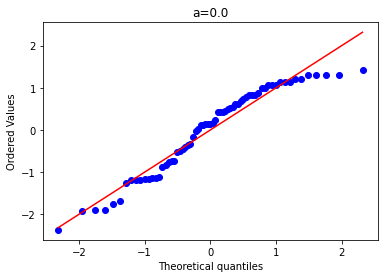

In [296]:
ability_plot(df['Big Data Revenue'],a=0.0)

# War deaths

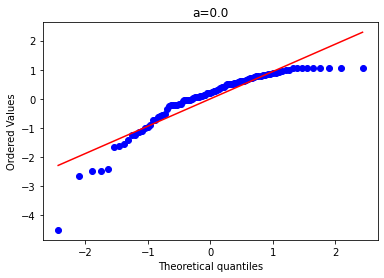

In [298]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/correlatesofwar/wars.csv')
ability_plot(df['batDeath'],a=0.0)

# Flu

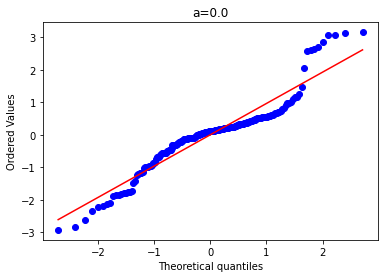

In [300]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/usda/avian_influenza/avian_flu_cleaned.csv')
ability_plot(df['Size'],a=0.0)

# Cars

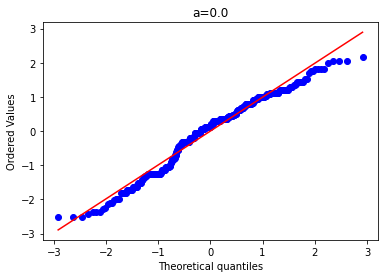

In [303]:
df= pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/uci_ml/auto-mpg/auto-mpg.csv')
ability_plot(df['horsepower'],a=0.0)

# Abalone

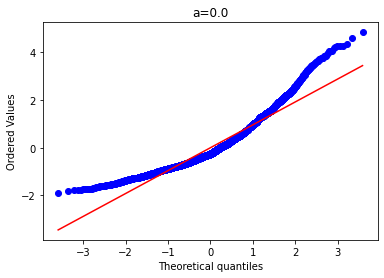

In [306]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/uci_ml/abalone/abalone.csv')
ability_plot(df['whole_weight'],a=0.0)

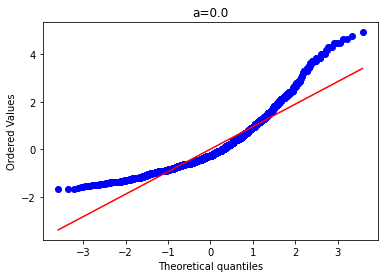

In [307]:
ability_plot(df['diameter'],a=0.0)